In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold, datasets, decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from ipywidgets import interact, fixed
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.patches import Ellipse
from scipy import linalg
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error
import os
from sklearn.cluster import KMeans
import osmnx as ox
import geopandas as gpd
#import plotly.express as px
import urllib.request
import zipfile
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity

import os
os.environ["OMP_NUM_THREADS"] = "2"

# Now import the necessary libraries
from sklearn.cluster import KMeans
import numpy as np



C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('../../data/tidy/completed-dataset.csv')

In [3]:
cols = df.columns[1:]  # Exclude the first column
for col in cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
    
df

msa  Node count  Edge count  \
0                          Abilene, TX     14357.0     39401.0   
1                            Akron, OH     26865.0     70900.0   
2                           Albany, GA      8466.0     22838.0   
3                   Albany-Lebanon, OR      7132.0     17906.0   
4          Albany-Schenectady-Troy, NY     36977.0     96867.0   
..                                 ...         ...         ...   
350                         Yakima, WA     10920.0     28902.0   
351                   York-Hanover, PA     16622.0     44476.0   
352  Youngstown-Warren-Boardman, OH-PA     24885.0     66650.0   
353                      Yuba City, CA      8419.0     21665.0   
354                           Yuma, AZ      9291.0     25210.0   

     Degree average  Edge length total (km)  Edge length average (km)  \
0          5.488751            17168.965935                  0.435749   
1          5.278243            15191.985931                  0.214273   
2          5.395228             9545.102272                  0.417948   
3          5.021312             8280.294430                  0.462431   
4          5.239311            27872.441864                  0.287739   
..              ...                     ...                       ...   
350        5.293407            14155.026874                  0.489759   
351        5.351462            13291.255851                  0.298841   
352        5.356641            19738.540791                  0.296152   
353        5.146692             7925.868395                  0.365837   
354        5.426757             8925.887915                  0.354061   

     Streets per node average  Intersection count  Street length total (km)  \
0                    2.881452             11912.0               8925.436120   
1                    2.756896             21200.0               8039.294972   
2                    2.837468              6957.0               4989.592979   
3                    2.568144              5101.0               4225.438910   
4                    2.755794             30254.0              14555.424691   
..                        ...                 ...                       ...   
350                  2.709982              8275.0               7249.500452   
351                  2.781194             13507.0               6831.204674   
352                  2.794736             19982.0              10381.621775   
353                  2.678465              6360.0               4094.273240   
354                  2.840491              7505.0               4715.715695   

     Street segment count  ...  Other Fuel (gal/gal equivalent)  \
0                 20606.0  ...                              0.0   
1                 36980.0  ...                              0.0   
2                 11954.0  ...                              0.0   
3                  9147.0  ...                              0.0   
4                 50900.0  ...                              0.0   
..                    ...  ...                              ...   
350               14773.0  ...                              0.0   
351               23064.0  ...                              0.0   
352               34674.0  ...                              0.0   
353               11260.0  ...                              0.0   
354               13203.0  ...                              0.0   

     Electric Propulsion (kwh)  Electric Battery (kwh)  Diesel (miles)  \
0                          0.0                     0.0             0.0   
1                          0.0                     0.0       2619706.0   
2                          0.0                     0.0        148053.0   
3                          0.0                     0.0             0.0   
4                          0.0                 42126.0       8632669.0   
..                         ...                     ...             ...   
350                        0.0                     0.0        730634.0   
351                

In [4]:
# List of columns to extract
columns_to_extract = ['msa', 'Carbon Dioxide (Ton)', 'Methane (Ton)', 'Nitrous Oxide (Ton)']

# Create a new DataFrame with the specified columns
gas_df = df[columns_to_extract]
gas_df

msa  Carbon Dioxide (Ton)  Methane (Ton)  \
0                          Abilene, TX          5.326790e+05      27.982048   
1                            Akron, OH          2.007387e+06     167.528086   
2                           Albany, GA          2.638313e+05      20.830185   
3                   Albany-Lebanon, OR          9.552332e+05      98.024056   
4          Albany-Schenectady-Troy, NY          8.783815e+05      57.610234   
..                                 ...                   ...            ...   
350                         Yakima, WA          1.332427e+06     151.627668   
351                   York-Hanover, PA          2.067360e+06     219.975493   
352  Youngstown-Warren-Boardman, OH-PA          1.022715e+06     100.220975   
353                      Yuba City, CA          2.886964e+05       7.997358   
354                           Yuma, AZ          1.276699e+06     130.593627   

     Nitrous Oxide (Ton)  
0               5.061424  
1              25.020546  
2               4.532440  
3              21.206253  
4              11.738693  
..                   ...  
350            32.085481  
351            47.809417  
352            15.492664  
353             3.849678  
354            29.531908  

[355 rows x 4 columns]

In [5]:
factors_df = df.drop(columns=columns_to_extract[1:])
factors_df

# Replace leading spaces in column names for easier reference
factors_df.columns = factors_df.columns.str.strip()

factors_df = factors_df.drop(columns=['Taxicab, motorcycle, or other means'])

In [6]:
factors_df['Population density (people/sq km)'] = factors_df['Total population']/factors_df['Area (sq km)']

In [7]:
factors_df.columns

Index(['msa', 'Node count', 'Edge count', 'Degree average',
       'Edge length total (km)', 'Edge length average (km)',
       'Streets per node average', 'Intersection count',
       'Street length total (km)', 'Street segment count',
       'Street length average (km)', 'Circuity average',
       'Self-loop proportion', 'Node density (per sq km)',
       'Intersection density (per sq km)', 'Edge density (km/sq km)',
       'Street density (km/sq km)', 'Building area (sq km)', 'Area (sq km)',
       'Car, truck, or van:', 'Public transportation (excluding taxicab):',
       'Bicycle', 'Walked', 'Worked from home', 'Median Income',
       'Employment Rate', 'Unemployment Rate', 'Total population',
       'Total housing units', 'No vehicles available', '1 vehicle available',
       '2 vehicles available', '3 or more vehicles available',
       'Agriculture, forestry, fishing and hunting, and mining',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Tra

In [8]:
factors_df.drop(columns=['Liquefied Petroleum Gas (miles)'], inplace=True)


In [9]:
factors_df.columns

Index(['msa', 'Node count', 'Edge count', 'Degree average',
       'Edge length total (km)', 'Edge length average (km)',
       'Streets per node average', 'Intersection count',
       'Street length total (km)', 'Street segment count',
       'Street length average (km)', 'Circuity average',
       'Self-loop proportion', 'Node density (per sq km)',
       'Intersection density (per sq km)', 'Edge density (km/sq km)',
       'Street density (km/sq km)', 'Building area (sq km)', 'Area (sq km)',
       'Car, truck, or van:', 'Public transportation (excluding taxicab):',
       'Bicycle', 'Walked', 'Worked from home', 'Median Income',
       'Employment Rate', 'Unemployment Rate', 'Total population',
       'Total housing units', 'No vehicles available', '1 vehicle available',
       '2 vehicles available', '3 or more vehicles available',
       'Agriculture, forestry, fishing and hunting, and mining',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Tra

In [10]:
factors_df.drop(columns=['Agriculture, forestry, fishing and hunting, and mining',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing, and utilities', 'Information',
       'Finance and insurance, and real estate and rental and leasing',
       'Professional, scientific, and management, and administrative and waste management services',
       'Educational services, and health care and social assistance',
       'Arts, entertainment, and recreation, and accommodation and food services',
       'Other services, except public administration', 'Public administration'], inplace=True)

In [11]:
factors_df.columns
factors_df

factors_df.to_csv('../../data/tidy/raw-data-cleaned.csv', index=False)
factors_df

msa  Node count  Edge count  \
0                          Abilene, TX     14357.0     39401.0   
1                            Akron, OH     26865.0     70900.0   
2                           Albany, GA      8466.0     22838.0   
3                   Albany-Lebanon, OR      7132.0     17906.0   
4          Albany-Schenectady-Troy, NY     36977.0     96867.0   
..                                 ...         ...         ...   
350                         Yakima, WA     10920.0     28902.0   
351                   York-Hanover, PA     16622.0     44476.0   
352  Youngstown-Warren-Boardman, OH-PA     24885.0     66650.0   
353                      Yuba City, CA      8419.0     21665.0   
354                           Yuma, AZ      9291.0     25210.0   

     Degree average  Edge length total (km)  Edge length average (km)  \
0          5.488751            17168.965935                  0.435749   
1          5.278243            15191.985931                  0.214273   
2          5.395228             9545.102272                  0.417948   
3          5.021312             8280.294430                  0.462431   
4          5.239311            27872.441864                  0.287739   
..              ...                     ...                       ...   
350        5.293407            14155.026874                  0.489759   
351        5.351462            13291.255851                  0.298841   
352        5.356641            19738.540791                  0.296152   
353        5.146692             7925.868395                  0.365837   
354        5.426757             8925.887915                  0.354061   

     Streets per node average  Intersection count  Street length total (km)  \
0                    2.881452             11912.0               8925.436120   
1                    2.756896             21200.0               8039.294972   
2                    2.837468              6957.0               4989.592979   
3                    2.568144              5101.0               4225.438910   
4                    2.755794             30254.0              14555.424691   
..                        ...                 ...                       ...   
350                  2.709982              8275.0               7249.500452   
351                  2.781194             13507.0               6831.204674   
352                  2.794736             19982.0              10381.621775   
353                  2.678465              6360.0               4094.273240   
354                  2.840491              7505.0               4715.715695   

     Street segment count  ...  Other Fuel (gal/gal equivalent)  \
0                 20606.0  ...                              0.0   
1                 36980.0  ...                              0.0   
2                 11954.0  ...                              0.0   
3                  9147.0  ...                              0.0   
4                 50900.0  ...                              0.0   
..                    ...  ...                              ...   
350               14773.0  ...                              0.0   
351               23064.0  ...                              0.0   
352               34674.0  ...                              0.0   
353               11260.0  ...                              0.0   
354               13203.0  ...                              0.0   

     Electric Propulsion (kwh)  Electric Battery (kwh)  Diesel (miles)  \
0                          0.0                     0.0             0.0   
1                          0.0                     0.0       2619706.0   
2                          0.0                     0.0        148053.0   
3                          0.0                     0.0             0.0   
4                          0.0                 42126.0       8632669.0   
..                         ...                     ...             ...   
350                        0.0                     0.0        730634.0   
351                

In [12]:
factors_df.columns

Index(['msa', 'Node count', 'Edge count', 'Degree average',
       'Edge length total (km)', 'Edge length average (km)',
       'Streets per node average', 'Intersection count',
       'Street length total (km)', 'Street segment count',
       'Street length average (km)', 'Circuity average',
       'Self-loop proportion', 'Node density (per sq km)',
       'Intersection density (per sq km)', 'Edge density (km/sq km)',
       'Street density (km/sq km)', 'Building area (sq km)', 'Area (sq km)',
       'Car, truck, or van:', 'Public transportation (excluding taxicab):',
       'Bicycle', 'Walked', 'Worked from home', 'Median Income',
       'Employment Rate', 'Unemployment Rate', 'Total population',
       'Total housing units', 'No vehicles available', '1 vehicle available',
       '2 vehicles available', '3 or more vehicles available', 'GDP',
       'Diesel (gal)', 'Gasoline (gal)',
       'Liquefied Petroleum Gas (gal equivalent)',
       'Compressed Natural Gas (gal equivalent)', 'B

In [13]:
factors_df = factors_df.rename(columns={
    'Street length total (km)': 'Street Length (km)',
    'Intersection density (per sq km)': 'Intersection Density (per sq km)',
    'Street density (km/sq km)': 'Street Density (km/sq km)',
    'Building area (sq km)': 'Building Area (sq km)',
    'Median Income': 'Median Income ($)',
    'Total population': 'Population',
    'Total housing units': 'Housing Units',
    '1 vehicle available': '1 Vehicle Available',
    '2 vehicle available': '2 Vehicle Available',
    '3 or more vehicle available': '3 or More Vehicle Available',
    'No vehicle available': 'No Vehicle Available',
    'GDP': 'GDP ($)',
    'Population density (people/sq km)': 'Population Density (people/sq km)',
    'Car, truck, or van:': 'Personal Vehicle (mode share %)',
    'Public transportation (excluding taxicab):':'Public Transportation (mode share %)',
    'Bicycle':'Bicycle (mode share %)',
    'Walked':'Walked (mode share %)',
    'Worked from home':'Worked from Home (mode share %)',
    'Employment Rate':'Employment Rate (%)',
    'Unemployment Rate':'Unemployment Rate (%)',
    'Liquefied Petroleum Gas (gal equivalent)':'Liquefied Petroleum Gas (GGE)',
    'Compressed Natural Gas (gal equivalent)':'Compressed Natural Gas (GGE)',
    'Other Fuel (gal/gal equivalent)':'Other Fuel (GGE)',
    'Node count':'Node Count',
    'Edge count':'Edge Count',
    'Degree average':'Degree Average',
    'Edge length total (km)':'Edge Length Total (km)',
    'Edge length average (km)':'Edge Length Average (km)',
    'Streets per node average':'Streets per Node Average',
    'Intersection count':'Intersection Count',
    'Street length total (km)':'Street Length Total (km)',
    'Street segment count':'Street Segment Count',
    'Street length average (km)':'Street Length Average (km)',
    'Circuity average':'Circuity Average',
    'Self-loop proportion':'Self-loop Proportion',
    'Node density (per sq km)':'Node Density (per sq km)',
    'Intersection density (per sq km)':'Intersection Density (per sq km)',
    'Edge density (km/sq km)':'Edge Density (km/sq km)',
    'Street density (km/sq km)':'Street Density (km/sq km)',
    'Building area (sq km)':'Building Area (sq km)'
})

In [14]:
factors_df.columns

Index(['msa', 'Node Count', 'Edge Count', 'Degree Average',
       'Edge Length Total (km)', 'Edge Length Average (km)',
       'Streets per Node Average', 'Intersection Count',
       'Street Length Total (km)', 'Street Segment Count',
       'Street Length Average (km)', 'Circuity Average',
       'Self-loop Proportion', 'Node Density (per sq km)',
       'Intersection Density (per sq km)', 'Edge Density (km/sq km)',
       'Street Density (km/sq km)', 'Building Area (sq km)', 'Area (sq km)',
       'Personal Vehicle (mode share %)',
       'Public Transportation (mode share %)', 'Bicycle (mode share %)',
       'Walked (mode share %)', 'Worked from Home (mode share %)',
       'Median Income ($)', 'Employment Rate (%)', 'Unemployment Rate (%)',
       'Population', 'Housing Units', 'No vehicles available',
       '1 Vehicle Available', '2 vehicles available',
       '3 or more vehicles available', 'GDP ($)', 'Diesel (gal)',
       'Gasoline (gal)', 'Liquefied Petroleum Gas (GGE)',
 

In [15]:
X = factors_df.drop('msa', axis=1)

# Standardizing the Data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=factors_df.columns[1:])

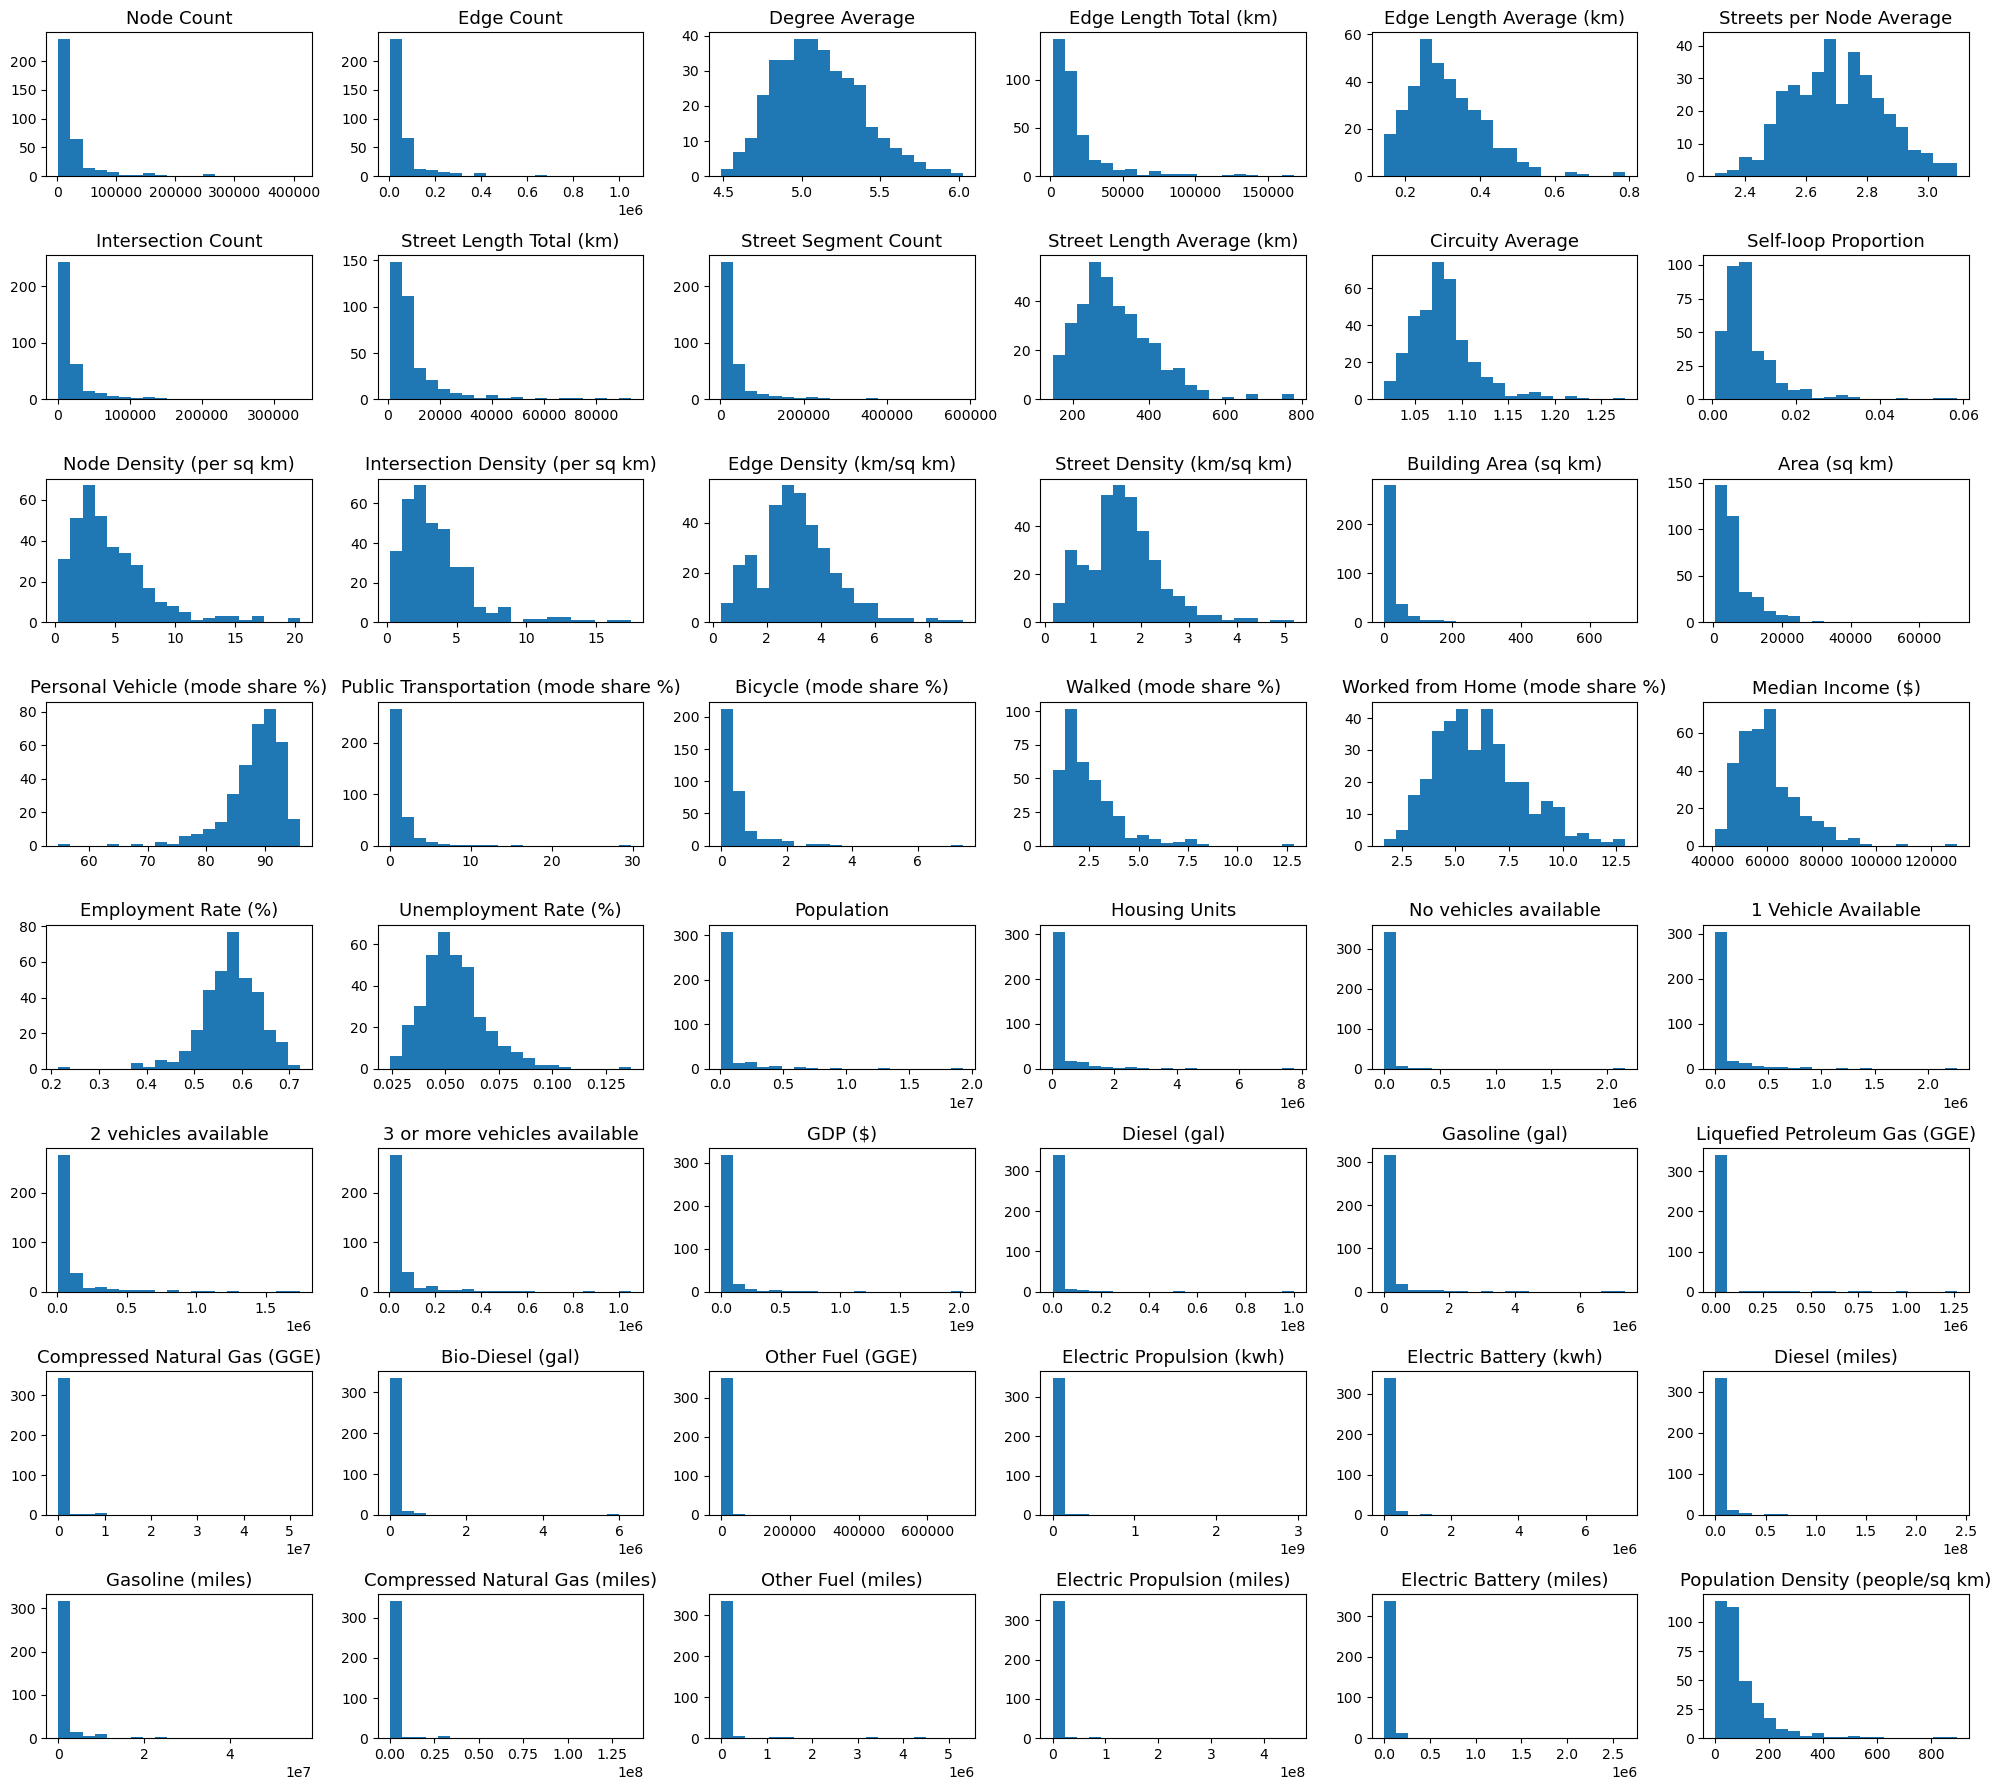

In [16]:
# Generate the histograms
axes = factors_df.hist(bins=20, figsize=(20, 18), layout=(8, 6))

# Adjust the title font size for each subplot
for ax in axes.flatten():
    ax.title.set_size(13)  # Set the desired font size
    ax.grid(False)

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('../../figures/merged_msa-histogram.jpg', dpi=600)

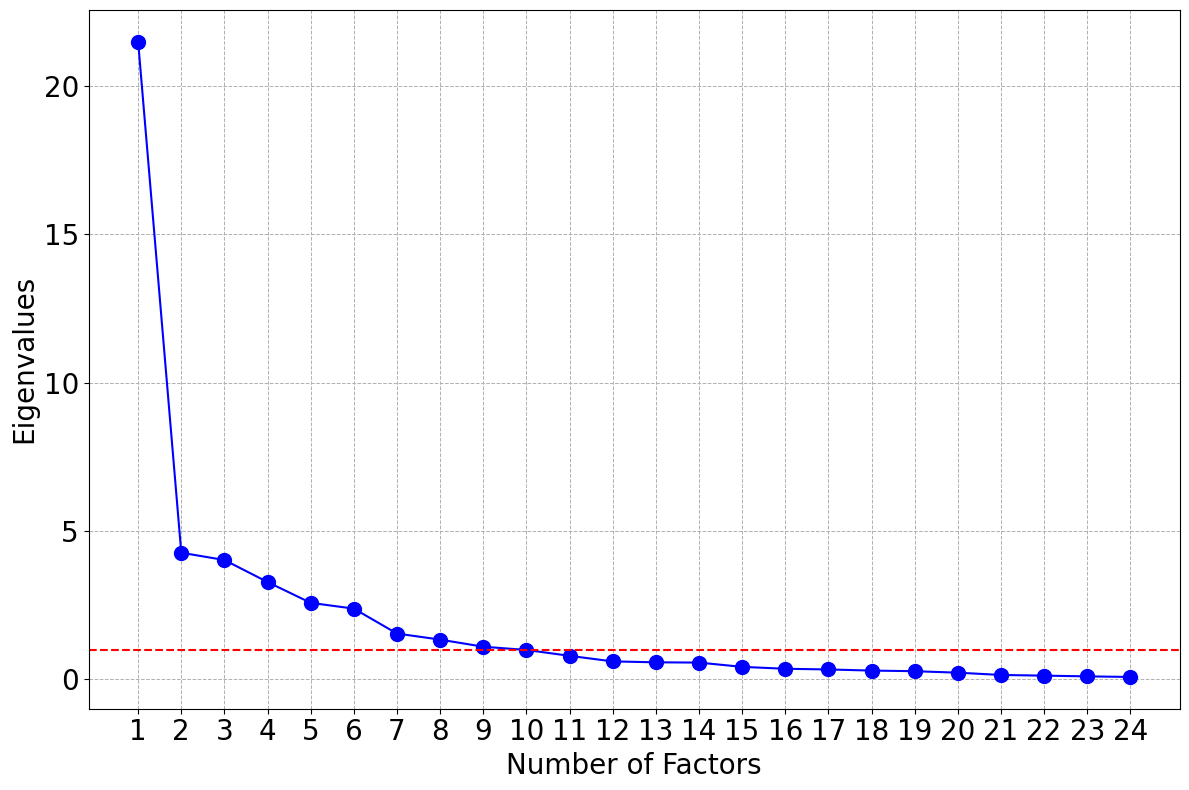

In [31]:



pca = PCA()
pca.fit(data_standardized)

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Define the number of factors based on the length of eigenvalues
num_factors = 30

# Create a scree plot
plt.figure(figsize=(12, 8))  # Adjusted figure size
plt.plot(np.arange(1, num_factors - 5), eigenvalues[:24], 'o-', markersize=10, color='b', label='Eigenvalues')  # Enhanced marker size and color
plt.xlabel('Number of Factors', fontsize=20)  # Increased font size for better readability
plt.ylabel('Eigenvalues', fontsize=20)  # Increased font size for better readability
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion')  # Added label for horizontal line
plt.grid(True, which='both', linestyle='--', linewidth=0.7)  # Added gridlines for better readability
#plt.legend(fontsize=20)  # Added legend with increased font size

# Adjust the tick label size and set x-ticks to be integers
plt.xticks(ticks=np.arange(1, num_factors - 5, step=1), fontsize=20)  # X-axis tick labels size and integer ticks
plt.yticks(fontsize=20)  # Y-axis tick labels size

plt.tight_layout()  # Adjust layout to fit elements better
plt.savefig('../../figures/urban-scree-plot.jpg', dpi=600, bbox_inches='tight')

In [18]:
len(eigenvalues)

48

In [19]:
data_standardized.to_csv('../../data/tidy/raw-data-standardized.csv', index=False)

In [20]:
kmo_all, kmo_model = calculate_kmo(data_standardized)
bartlett_chi_square, bartlett_p_value = calculate_bartlett_sphericity(data_standardized)

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [21]:
kmo_model

0.8521334543589797

In [22]:
kmo_all

array([0.88889404, 0.88704592, 0.33518157, 0.82531613, 0.60983029,
       0.29930226, 0.91799818, 0.82898323, 0.86887885, 0.60913352,
       0.83736361, 0.52074512, 0.85300927, 0.80773959, 0.65380296,
       0.67411388, 0.94359601, 0.8601941 , 0.71873444, 0.86068315,
       0.49691817, 0.37930699, 0.61119132, 0.85714444, 0.63721673,
       0.6390118 , 0.96246422, 0.92775948, 0.90925412, 0.91352246,
       0.96434162, 0.91553488, 0.96012273, 0.92940076, 0.91460257,
       0.67722052, 0.85367124, 0.56225796, 0.86534139, 0.87747073,
       0.79462768, 0.94300555, 0.91812206, 0.86251512, 0.84061099,
       0.88363401, 0.79056184, 0.98653142])

In [23]:
kmo_all = pd.DataFrame([kmo_all], columns=factors_df.columns[1:])
kmo_all

Node Count  Edge Count  Degree Average  Edge Length Total (km)  \
0    0.888894    0.887046        0.335182                0.825316   

   Edge Length Average (km)  Streets per Node Average  Intersection Count  \
0                   0.60983                  0.299302            0.917998   

   Street Length Total (km)  Street Segment Count  Street Length Average (km)  \
0                  0.828983              0.868879                    0.609134   

   ...  Other Fuel (GGE)  Electric Propulsion (kwh)  Electric Battery (kwh)  \
0  ...          0.865341                   0.877471                0.794628   

   Diesel (miles)  Gasoline (miles)  Compressed Natural Gas (miles)  \
0        0.943006          0.918122                        0.862515   

   Other Fuel (miles)  Electric Propulsion (miles)  Electric Battery (miles)  \
0            0.840611                     0.883634                  0.790562   

   Population Density (people/sq km)  
0                           0.986531  

[1 rows x 48 columns]

In [24]:
columns_below = kmo_all.loc[:, kmo_all.iloc[0] < 0.5].columns
columns_below

Index(['Degree Average', 'Streets per Node Average', 'Bicycle (mode share %)',
       'Walked (mode share %)'],
      dtype='object')

In [25]:
bartlett_chi_square

52321.0919072915

In [26]:
bartlett_p_value

0.0

In [27]:
mean_values = data_standardized.mean()
mean_values
std_deviation = data_standardized.std()
std_deviation

Node Count                              1.001411
Edge Count                              1.001411
Degree Average                          1.001411
Edge Length Total (km)                  1.001411
Edge Length Average (km)                1.001411
Streets per Node Average                1.001411
Intersection Count                      1.001411
Street Length Total (km)                1.001411
Street Segment Count                    1.001411
Street Length Average (km)              1.001411
Circuity Average                        1.001411
Self-loop Proportion                    1.001411
Node Density (per sq km)                1.001411
Intersection Density (per sq km)        1.001411
Edge Density (km/sq km)                 1.001411
Street Density (km/sq km)               1.001411
Building Area (sq km)                   1.001411
Area (sq km)                            1.001411
Personal Vehicle (mode share %)         1.001411
Public Transportation (mode share %)    1.001411
Bicycle (mode share 

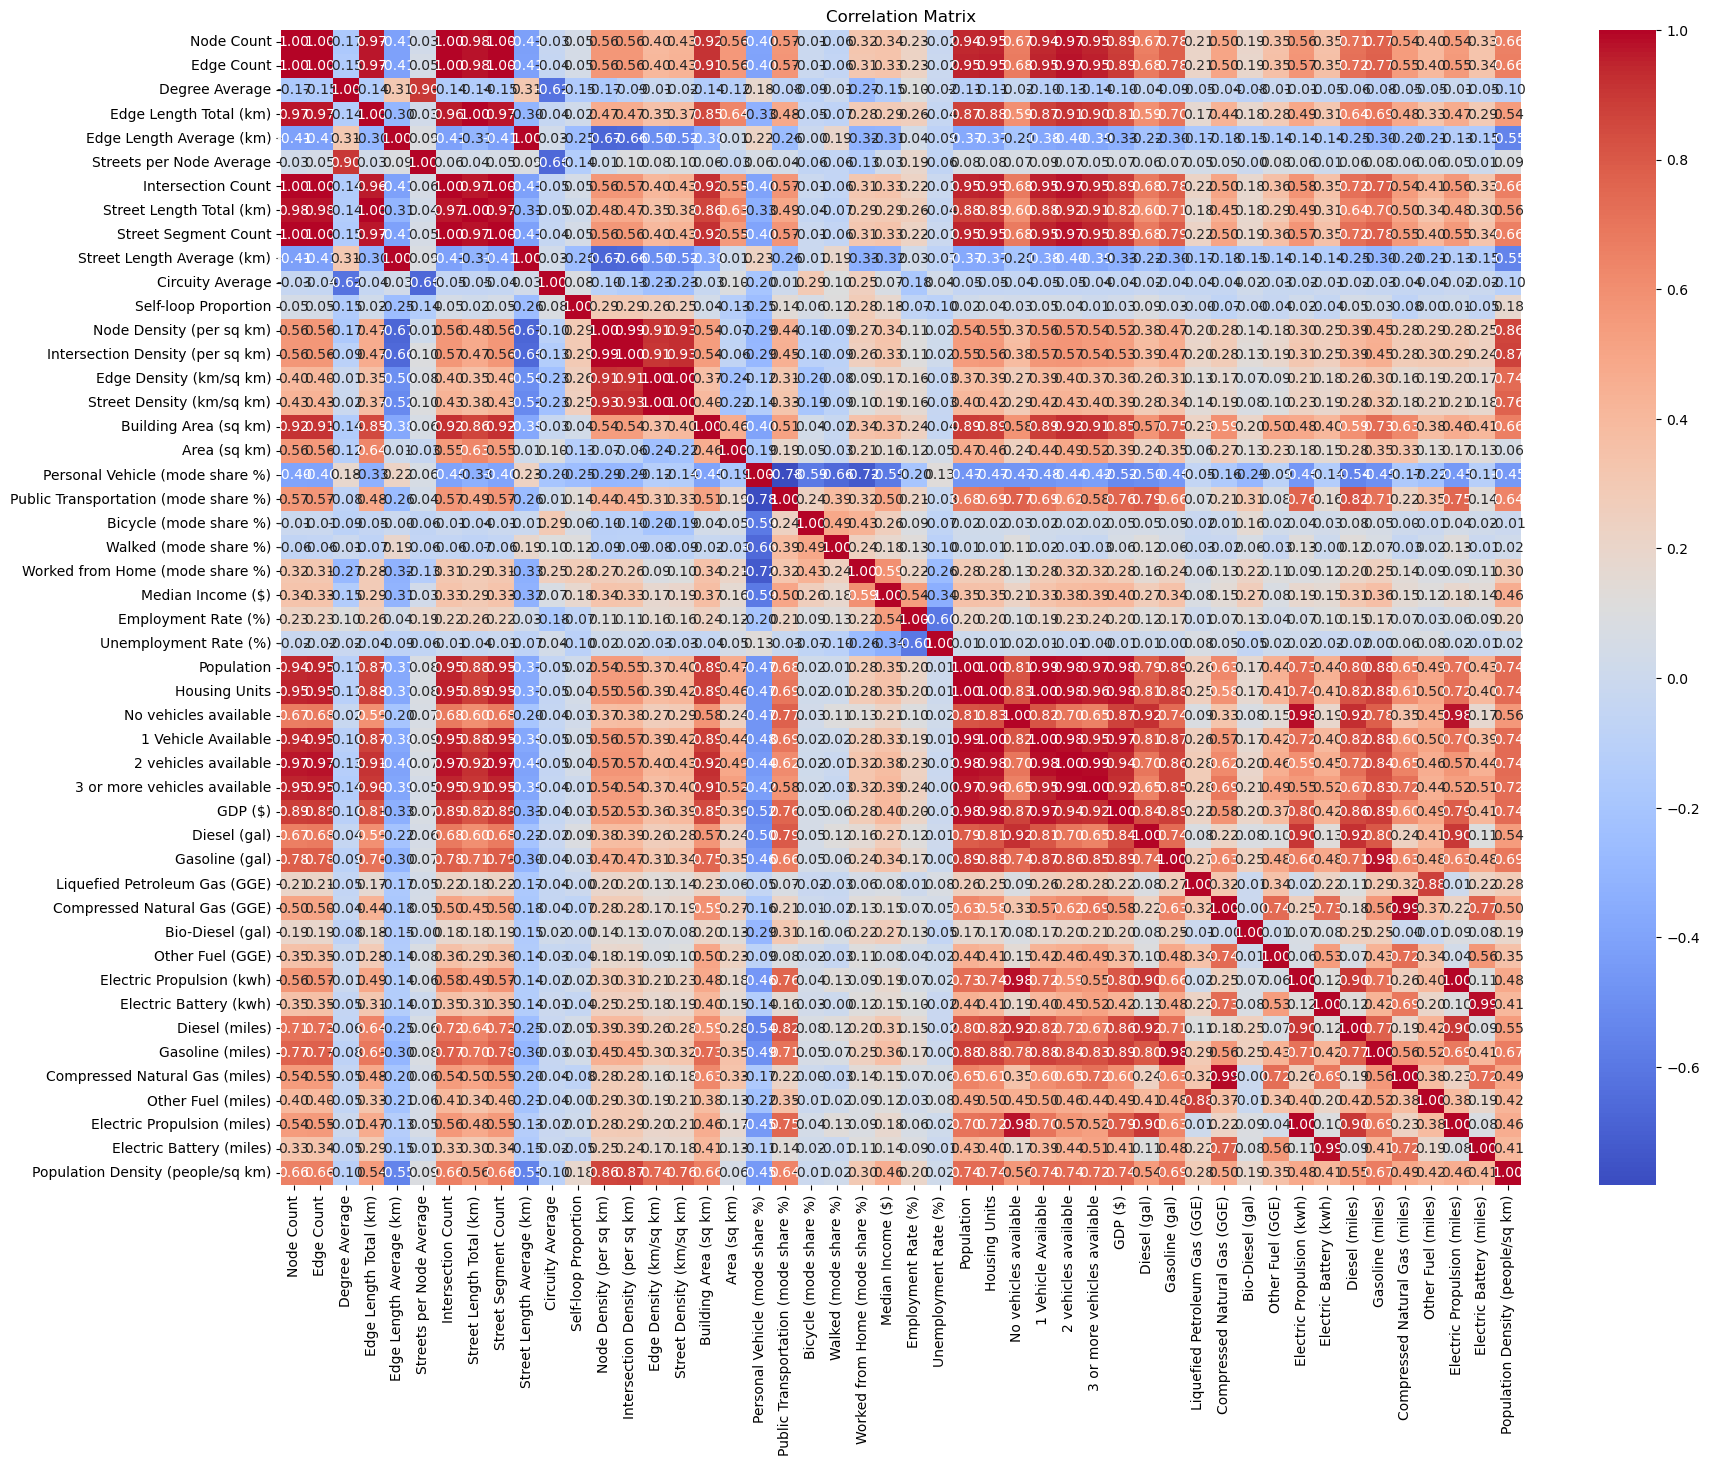

In [28]:
# Now calculate the correlation matrix
corr_matrix = X.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = data_standardized.columns
vif_data["VIF"] = [variance_inflation_factor(data_standardized.values, i) for i in range(len(data_standardized.columns))]
vif_data

feature           VIF
0                             Node Count   3342.825201
1                             Edge Count  23373.103418
2                         Degree Average     64.282526
3                 Edge Length Total (km)  32713.052997
4               Edge Length Average (km)   2953.596007
5               Streets per Node Average     64.269674
6                     Intersection Count  16818.207641
7               Street Length Total (km)  37546.925892
8                   Street Segment Count  45058.548506
9             Street Length Average (km)   3017.649082
10                      Circuity Average      2.705121
11                  Self-loop Proportion      1.953550
12              Node Density (per sq km)    556.398953
13      Intersection Density (per sq km)    692.267711
14               Edge Density (km/sq km)   4587.795511
15             Street Density (km/sq km)   5431.971095
16                 Building Area (sq km)     16.618666
17                          Area (sq km)      6.670731
18       Personal Vehicle (mode share %)     65.928740
19  Public Transportation (mode share %)     23.965180
20                Bicycle (mode share %)      3.106411
21                 Walked (mode share %)      8.419093
22       Worked from Home (mode share %)     14.135748
23                     Median Income ($)      5.003775
24                   Employment Rate (%)      3.467637
25                 Unemployment Rate (%)      2.039498
26                            Population   1644.478913
27                         Housing Units   4555.151954
28                 No vehicles available    458.625710
29                   1 Vehicle Available   1953.066106
30                  2 vehicles available   1263.050505
31          3 or more vehicles available    614.165069
32                               GDP ($)    156.507340
33                          Diesel (gal)     25.438146
34                        Gasoline (gal)     77.725624
35         Liquefied Petroleum Gas (GGE)     12.814653
36          Compressed Natural Gas (GGE)    138.735233
37                      Bio-Diesel (gal)      2.694827
38                      Other Fuel (GGE)      4.973049
39             Electric Propulsion (kwh)    488.284864
40                Electric Battery (kwh)     56.708546
41                        Diesel (miles)     37.618715
42                      Gasoline (miles)     72.114476
43        Compressed Natural Gas (miles)    116.331201
44                    Other Fuel (miles)     15.259128
45           Electric Propulsion (miles)    442.416815
46              Electric Battery (miles)     64.680577
47     Population Density (people/sq km)     18.165545

In [30]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from scipy.stats import chi2

# Assuming 'data_standardized' is your standardized data
# Define the range of numbers of factors to test
min_factors = 7
max_factors = 8  # Adjust as needed

# List of rotations to try
rotations = ['varimax', 'oblimax', 'quartimax', 'equamax', 'geomin_ort', 'promax', 'oblimin', 'quartimin', 'geomin_obl', None]

# Initialize dictionaries to store factor loadings and statistics
factor_loadings = {}
statistics = {}



# Iterate over each number of factors
for n_factors in range(min_factors, max_factors + 1):
    # Initialize dictionaries for factor loadings and statistics for current n_factors
    factor_loadings[n_factors] = {}
    statistics[n_factors] = {}

    # Iterate over each rotation method
    for rotation in rotations:
        # Initialize FactorAnalyzer with current rotation and number of factors
        fa = FactorAnalyzer(n_factors=n_factors, rotation=rotation, method='ml')
        
        # Fit the data
        fa.fit(data_standardized)
        
        # Get factor loadings
        loadings = fa.loadings_
        
        # Store factor loadings in the dictionary
        factor_loadings[n_factors][rotation] = loadings
        
        n_samples, n_variables = data_standardized.shape
    
        # Degrees of freedom for the null model
        dof_null = (n_variables * (n_variables + 1)) / 2

        # Approximate chi-square value for the null model
        # This is a rough estimate; you may need to adjust based on your data
        chi_square_null = dof_null * (n_samples - 1)
        dof = data_standardized.shape[0] - n_factors - 1
        
        
         # Calculate RMSR
        residuals = fa.get_uniquenesses()
        squared_residuals = np.square(residuals)
        sum_squared_residuals = np.sum(squared_residuals)
        RMSR = np.sqrt(sum_squared_residuals / dof)

        # Calculate RMSEA
        communalities = fa.get_communalities()
        mean_communalities = np.mean(communalities)
        RMSEA = np.sqrt(mean_communalities / dof)
        
         # Calculate statistics
        chi_square_value = fa.get_factor_variance()[2].sum()
        dof = data_standardized.shape[0] - n_factors - 1

        TLI = 1 - (chi_square_value / dof) / (chi_square_null / dof_null)
        BIC = chi_square_value + n_factors * np.log(n_samples)
        p_value = 1 - chi2.cdf(chi_square_value, dof)
        rms = RMSR
        rmsea = RMSEA
        
        variance_explained = fa.get_factor_variance()[0].sum()
        cumulative_variance = fa.get_factor_variance()[2][-1]
        
        # Store statistics in the dictionary
        statistics[n_factors][rotation] = {
            'Chi-Square Value': chi_square_value,
            'Degrees of Freedom': dof,
            'RMS': rms,
            'RMSEA': rmsea,
            'BIC': BIC,
            'TLI': TLI,
            'Variance Explained': variance_explained,
            'Cumulative Variance': cumulative_variance
        }

# Create DataFrame to hold the statistics
metrics = ['Chi-Square Value', 'Degrees of Freedom', 'RMS', 'RMSEA', 'BIC', 'TLI', 'Variance Explained', 'Cumulative Variance']
comparison_df = pd.DataFrame(index=metrics)

# Populate the DataFrame with the best values across different numbers of factors and rotations
for n_factors in range(min_factors, max_factors + 1):
    for rotation in rotations:
        # Choose the best statistic based on BIC or other criteria you decide
        # Here we choose based on BIC, you can adjust according to your preference
        best_statistic = statistics[n_factors][rotation]['BIC']
        
        # Populate the DataFrame with the best statistic for each metric
        for metric in metrics:
            comparison_df.loc[metric, f'{n_factors}_{rotation}'] = statistics[n_factors][rotation][metric]

comparison_df


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Loca

7_varimax   7_oblimax  7_quartimax   7_equamax  \
Chi-Square Value       3.895901    4.396079     4.301386    4.301386   
Degrees of Freedom   347.000000  347.000000   347.000000  347.000000   
RMS                    0.135796    0.135796     0.135796    0.135796   
RMSEA                  0.047149    0.047149     0.047149    0.047149   
BIC                   45.000726   45.500904    45.406211   45.406211   
TLI                    0.999968    0.999964     0.999965    0.999965   
Variance Explained    37.025981   37.025981    37.025981   37.025981   
Cumulative Variance    0.771375    0.771375     0.771375    0.771375   

                     7_geomin_ort    7_promax   7_oblimin  7_quartimin  \
Chi-Square Value         4.299841    3.706728    3.161042     3.161042   
Degrees of Freedom     347.000000  347.000000  347.000000   347.000000   
RMS                      0.135796    0.159802    0.162992     0.162992   
RMSEA                    0.047149    0.046328    0.043342     0.043342   
BIC                     45.404666   44.811552   44.265866    44.265866   
TLI                      0.999965    0.999970    0.999974     0.999974   
Variance Explained      37.025981   35.749206   31.288561    31.288561   
Cumulative Variance      0.771375    0.744775    0.651845     0.651845   

                     7_geomin_obl      7_None   8_varimax   8_oblimax  \
Chi-Square Value         3.345921    4.396059    4.655491    5.127526   
Degrees of Freedom     347.000000  347.000000  346.000000  346.000000   
RMS                      0.160684    0.135796    0.143066    0.143066   
RMSEA                    0.043974    0.047149    0.047300    0.047300   
BIC                     44.450745   45.500884   51.632434   52.104468   
TLI                      0.999973    0.999964    0.999962    0.999958   
Variance Explained      32.208341   37.025981   37.156198   37.156198   
Cumulative Variance      0.671007    0.771375    0.774087    0.774087   

                     8_quartimax   8_equamax  8_geomin_ort    8_promax  \
Chi-Square Value        5.029322    5.029322      5.033362    4.366255   
Degrees of Freedom    346.000000  346.000000    346.000000  346.000000   
RMS                     0.143066    0.143066      0.143066    0.173051   
RMSEA                   0.047300    0.047300      0.047300    0.046317   
BIC                    52.006264   52.006264     52.010304   51.343197   
TLI                     0.999959    0.999959      0.999959    0.999964   
Variance Explained     37.156198   37.156198     37.156198   35.628012   
Cumulative Variance     0.774087    0.774087      0.774087    0.742250   

                      8_oblimin  8_quartimin  8_geomin_obl      8_None  
Chi-Square Value       3.648019     3.648019      4.121042    5.127473  
Degrees of Freedom   346.000000   346.000000    346.000000  346.000000  
RMS                    0.174080     0.174080      0.169237    0.143066  
RMSEA                  0.043068     0.043068      0.044740    0.047300  
BIC                   50.624962    50.624962     51.097984   52.104415  
TLI                    0.999970     0.999970      0.999966    0.999958  
Variance Explained    30.804715    30.804715     33.242975   37.156198  
Cumulative Variance    0.641765     0.641765      0.692562    0.774087

In [51]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer

# Assuming 'data_standardized' is your standardized data
# Define the range of numbers of factors to test
min_factors = 1
max_factors = 12  # Adjust as needed

# Initialize a dictionary to store statistics for each number of factors
statistics = {}



# Iterate over each number of factors
for n_factors in range(min_factors, max_factors + 1):
    # Initialize FactorAnalyzer with Maximum Likelihood method and no rotation
    fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax', method='ml')
    
    # Fit the data
    fa.fit(data_standardized)
    
    # Get factor loadings
    factor_loadings = fa.loadings_
    
    
#     chi_square_value = fa.get_factor_variance()[2]
#     dof = data_standardized.shape[0] - n_factors - 1

    n_samples, n_variables = data_standardized.shape

    # Degrees of freedom for the null model
    dof_null = (n_variables * (n_variables + 1)) / 2

    # Approximate chi-square value for the null model
    # This is a rough estimate; you may need to adjust based on your data
    chi_square_null = dof_null * (n_samples - 1)
    dof = data_standardized.shape[0] - n_factors - 1

    
    # Calculate RMSR
    residuals = fa.get_uniquenesses()
    squared_residuals = np.square(residuals)
    sum_squared_residuals = np.sum(squared_residuals)
    RMSR = np.sqrt(sum_squared_residuals / dof)
    
    # Calculate RMSEA
    communalities = fa.get_communalities()
    mean_communalities = np.mean(communalities)
    RMSEA = np.sqrt(mean_communalities / dof)
    
#     # Store results in dictionary or DataFrame
#     statistics[n_factors] = {
#         'Chi-Square Value': chi_square_value.mean(),
#         'Degrees of Freedom': dof,
#         'RMSR': RMSR,
#         'RMSEA': RMSEA,
#         'BIC': chi_square_value + n_factors * np.log(data_standardized.shape[0]),
#         'TLI': 1 - ((chi_square_value - dof) / chi_square_value),
#         'Variance Explained': fa.get_factor_variance()[0].mean(),
#         'Cumulative Variance': fa.get_factor_variance()[2][-1]
#     }
    

    
    
    # Calculate statistics
    chi_square_value = fa.get_factor_variance()[2].sum()
    dof = data_standardized.shape[0] - n_factors - 1
    
    TLI = 1 - (chi_square_value / dof) / (chi_square_null / dof_null)
    BIC = chi_square_value + n_factors * np.log(n_samples)
    variance_explained = fa.get_factor_variance()[0].sum()
    cumulative_variance = fa.get_factor_variance()[2][-1]
    
    # Store statistics in the dictionary
    statistics[n_factors] = {
        'Chi-Square Value': chi_square_value.mean(),
        'Degrees of Freedom': dof,
        'RMS': RMSR,
        'RMSEA': RMSEA,
        'BIC': BIC.mean(),
        'TLI': TLI.mean(),
        'Variance Explained': variance_explained,
        'Cumulative Variance': cumulative_variance
    }

# Create DataFrame to hold the statistics
metrics = ['Chi-Square Value', 'Degrees of Freedom', 'RMS', 'RMSEA', 'BIC', 'TLI', 'Variance Explained', 'Cumulative Variance']
comparison_df = pd.DataFrame(index=metrics)

# Populate the DataFrame with the average statistics for each number of factors
for n_factors, stats in statistics.items():
    for metric, value in stats.items():
        comparison_df.loc[metric, f'{n_factors} Factors'] = value


# metrics = ['Chi-Square Value', 'Degrees of Freedom', 'RMSR', 'RMSEA', 'BIC', 'TLI', 'Variance Explained', 'Cumulative Variance']
# comparison_df = pd.DataFrame(index=metrics)

# # Iterate over each number of factors
# for n_factors, stats in statistics.items():
#     for metric, value in stats.items():
#         # Ensure the metric is in the index and assign value to the corresponding column
#         if metric in metrics:
#             comparison_df.loc[metric, f'{n_factors} Factors'] = value

# Print the comparison DataFrame
comparison_df


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyz

1 Factors   2 Factors   3 Factors   4 Factors  \
Chi-Square Value       0.435918    0.929507    1.312476    1.750567   
Degrees of Freedom   353.000000  352.000000  351.000000  350.000000   
RMS                    0.246024    0.221929    0.208773    0.195430   
RMSEA                  0.035141    0.038506    0.040808    0.042456   
BIC                    6.308036   12.673743   18.928830   25.239038   
TLI                    0.999997    0.999993    0.999989    0.999986   
Variance Explained    20.924075   25.051596   28.056933   30.282270   
Cumulative Variance    0.435918    0.521908    0.584519    0.630881   

                      5 Factors   6 Factors   7 Factors   8 Factors  \
Chi-Square Value       2.409255    3.149166    3.895901    4.655491   
Degrees of Freedom   349.000000  348.000000  347.000000  346.000000   
RMS                    0.187556    0.163898    0.135796    0.143066   
RMSEA                  0.043485    0.045257    0.047149    0.047300   
BIC                   31.769844   38.381872   45.000726   51.632434   
TLI                    0.999980    0.999974    0.999968    0.999962   
Variance Explained    31.677779   34.212433   37.025981   37.156198   
Cumulative Variance    0.659954    0.712759    0.771375    0.774087   

                      9 Factors  10 Factors  11 Factors  12 Factors  
Chi-Square Value       5.621859    6.507384    7.355976    8.182972  
Degrees of Freedom   345.000000  344.000000  343.000000  342.000000  
RMS                    0.116674    0.113456    0.110919    0.104956  
RMSEA                  0.048851    0.049347    0.049616    0.049986  
BIC                   58.470919   65.228562   71.949272   78.648385  
TLI                    0.999954    0.999947    0.999939    0.999932  
Variance Explained    39.519461   40.209168   40.529526   41.016380  
Cumulative Variance    0.823322    0.837691    0.844365    0.854508

In [52]:
fa = FactorAnalyzer(n_factors=8, rotation='varimax', method='ml')
    
    # Fit the data
fa.fit(data_standardized)
fa.sufficiency(data_standardized.shape[0])

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")


(14291.418482857782, 772, 0.0)

In [53]:
data_standardized

Node Count  Edge Count  Degree Average  Edge Length Total (km)  \
0     -0.340119   -0.313531        1.394284               -0.089796   
1     -0.073031   -0.045155        0.627727               -0.180780   
2     -0.465912   -0.454650        1.053723               -0.440662   
3     -0.494398   -0.496671       -0.307877               -0.498871   
4      0.142895    0.176087        0.485957                0.402801   
..          ...         ...             ...                     ...   
350   -0.413511   -0.402984        0.682944               -0.228503   
351   -0.291754   -0.270291        0.894350               -0.268256   
352   -0.115311   -0.081366        0.913208                0.028462   
353   -0.466916   -0.464644        0.148688               -0.515182   
354   -0.448296   -0.434440        1.168535               -0.469159   

     Edge Length Average (km)  Streets per Node Average  Intersection Count  \
0                    1.204496                  1.187439           -0.308795   
1                   -0.989995                  0.364867           -0.058596   
2                    1.028113                  0.896967           -0.442272   
3                    1.468872                 -0.881657           -0.492269   
4                   -0.262060                  0.357593            0.185299   
..                        ...                       ...                 ...   
350                  1.739652                  0.055046           -0.406768   
351                 -0.152058                  0.525332           -0.265829   
352                 -0.178701                  0.614765           -0.091407   
353                  0.511774                 -0.153088           -0.458354   
354                  0.395091                  0.916933           -0.427510   

     Street Length Total (km)  Street Segment Count  \
0                   -0.105106             -0.314426   
1                   -0.179483             -0.062155   
2                   -0.435458             -0.447726   
3                   -0.499597             -0.490972   
4                    0.367444              0.152308   
..                        ...                   ...   
350                 -0.245774             -0.404294   
351                 -0.280884             -0.276556   
352                  0.017118             -0.097683   
353                 -0.510606             -0.458418   
354                 -0.458446             -0.428482   

     Street Length Average (km)  ...  Other Fuel (GGE)  \
0                      1.203868  ...         -0.097156   
1                     -0.954158  ...         -0.097156   
2                      1.046351  ...         -0.097156   
3                      1.491942  ...         -0.097156   
4                     -0.268342  ...         -0.097156   
..                          ...  ...               ...   
350                    1.779792  ...         -0.097156   
351                   -0.166082  ...         -0.097156   
352                   -0.133857  ...         -0.097156   
353                    0.508351  ...         -0.097156   
354                    0.443914  ...         -0.097156   

     Electric Propulsion (kwh)  Electric Battery (kwh)  Diesel (miles)  \
0                    -0.097615               -0.152178       -0.239195   
1                    -0.097615               -0.152178       -0.067667   
2                    -0.097615               -0.152178       -0.229501   
3                    -0.097615               -0.152178       -0.239195   
4                    -0.097615               -0.064929        0.326039   
..                         ...                     ...             ...   
350                  -0.097615               -0.152178       -0.191356   
351                  -0.097615               -0.152178       -0.205427   
352                  -0.097615               -0.152178       -0.143107   
353                  -0.097615               -0.152178       -0.178559   
354                  -0.097615 

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")


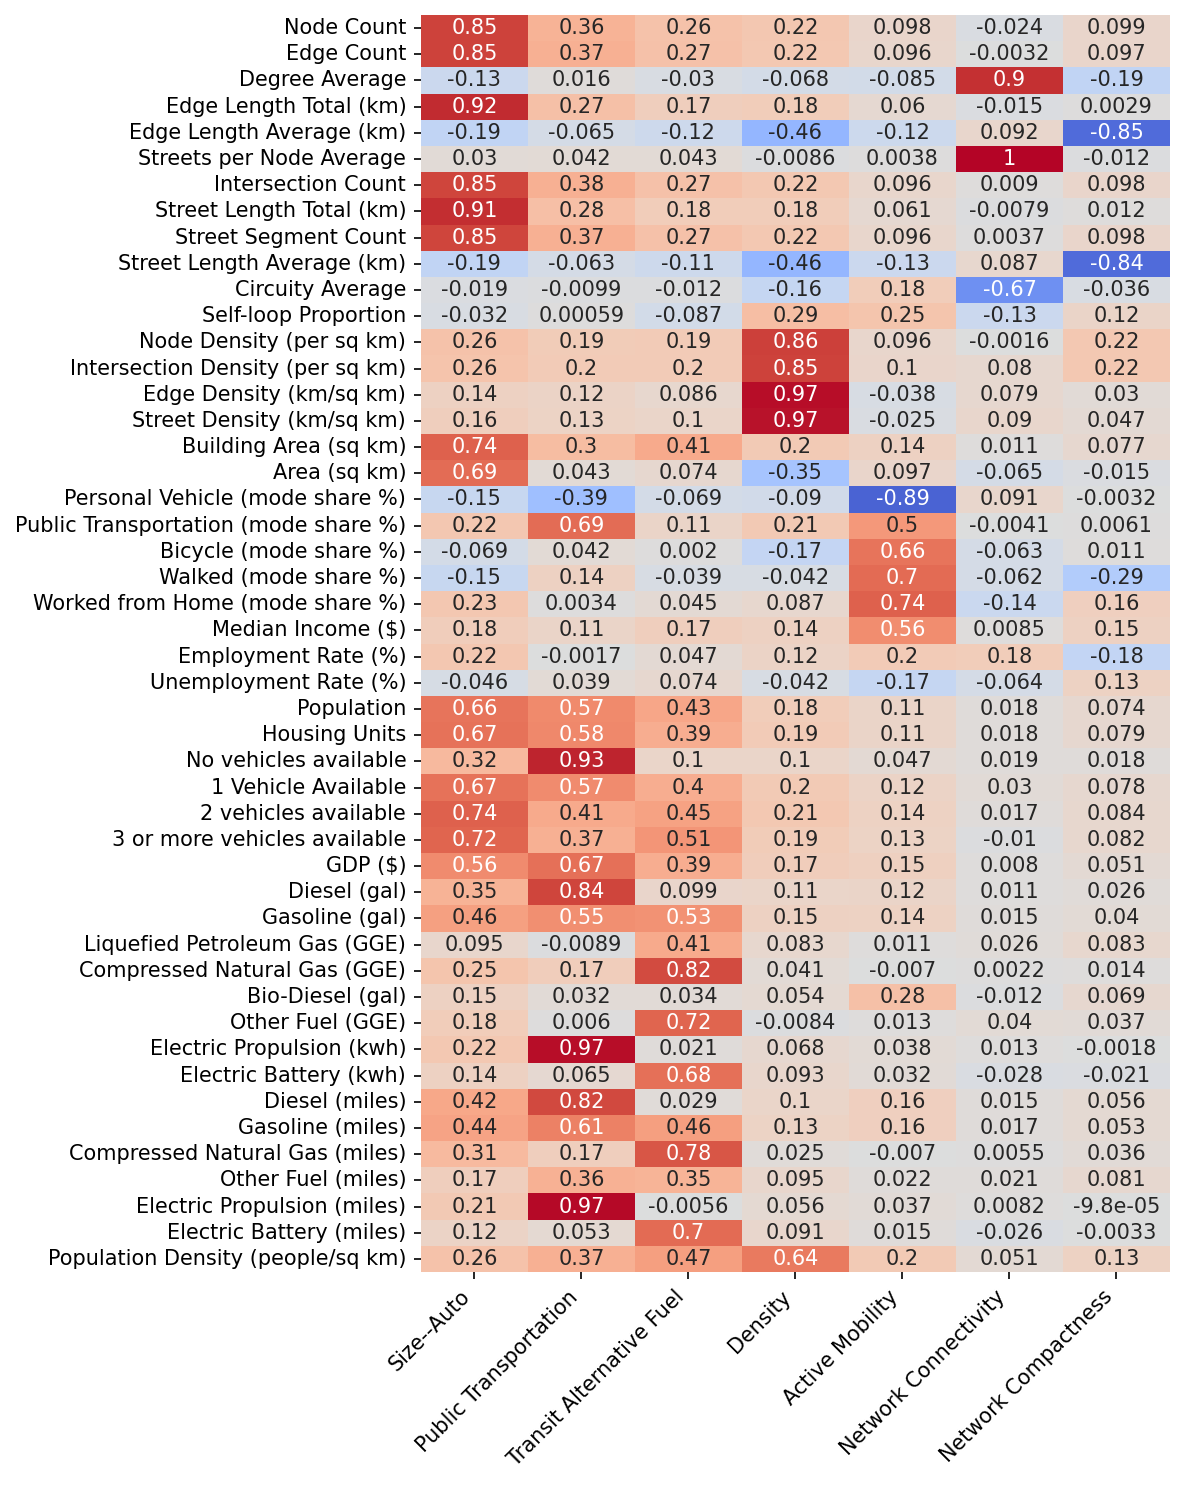

In [54]:
# Define the number of factors to retain
n_factors = 7

# Define factor names
factor_names = [
    'Size--Auto',
    'Public Transportation',
    'Transit Alternative Fuel',
    'Density',
    'Active Mobility',
    'Network Connectivity',
    'Network Compactness'
]

# Perform Factor Analysis for 'varimax' rotation
rotation = 'varimax'
fa = FactorAnalyzer(n_factors=n_factors, rotation=rotation, method='ml')
fa.fit(data_standardized)

# Get factor loadings
varimax_loadings = fa.loadings_

# Plot the factor loadings heatmap for 'varimax'
fig, ax = plt.subplots(figsize=(8, 10), dpi=150)  # Adjust figsize and dpi

sns.heatmap(varimax_loadings, annot=True, cmap='coolwarm', center=0, cbar=False, ax=ax)
#plt.title(f'Factor Loadings - {rotation}', fontsize=14)

# Set x-tick labels to factor names
plt.xticks(ticks=np.arange(n_factors) + 0.5, labels=factor_names, fontsize=10, rotation=45, ha='right')
plt.xlabel('')

# Set y-tick labels to the variable names and center them
plt.yticks(ticks=np.arange(len(data_standardized.columns)) + 0.5, labels=data_standardized.columns, fontsize=10, rotation=0)
plt.ylabel('')

plt.tight_layout()
plt.savefig('../../figures/varimax-loading-plots.jpg', dpi=600, bbox_inches='tight') 


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn(f"Failed to converge: {res.message}")
C:\Users\peiyaozhao\AppData\Loca

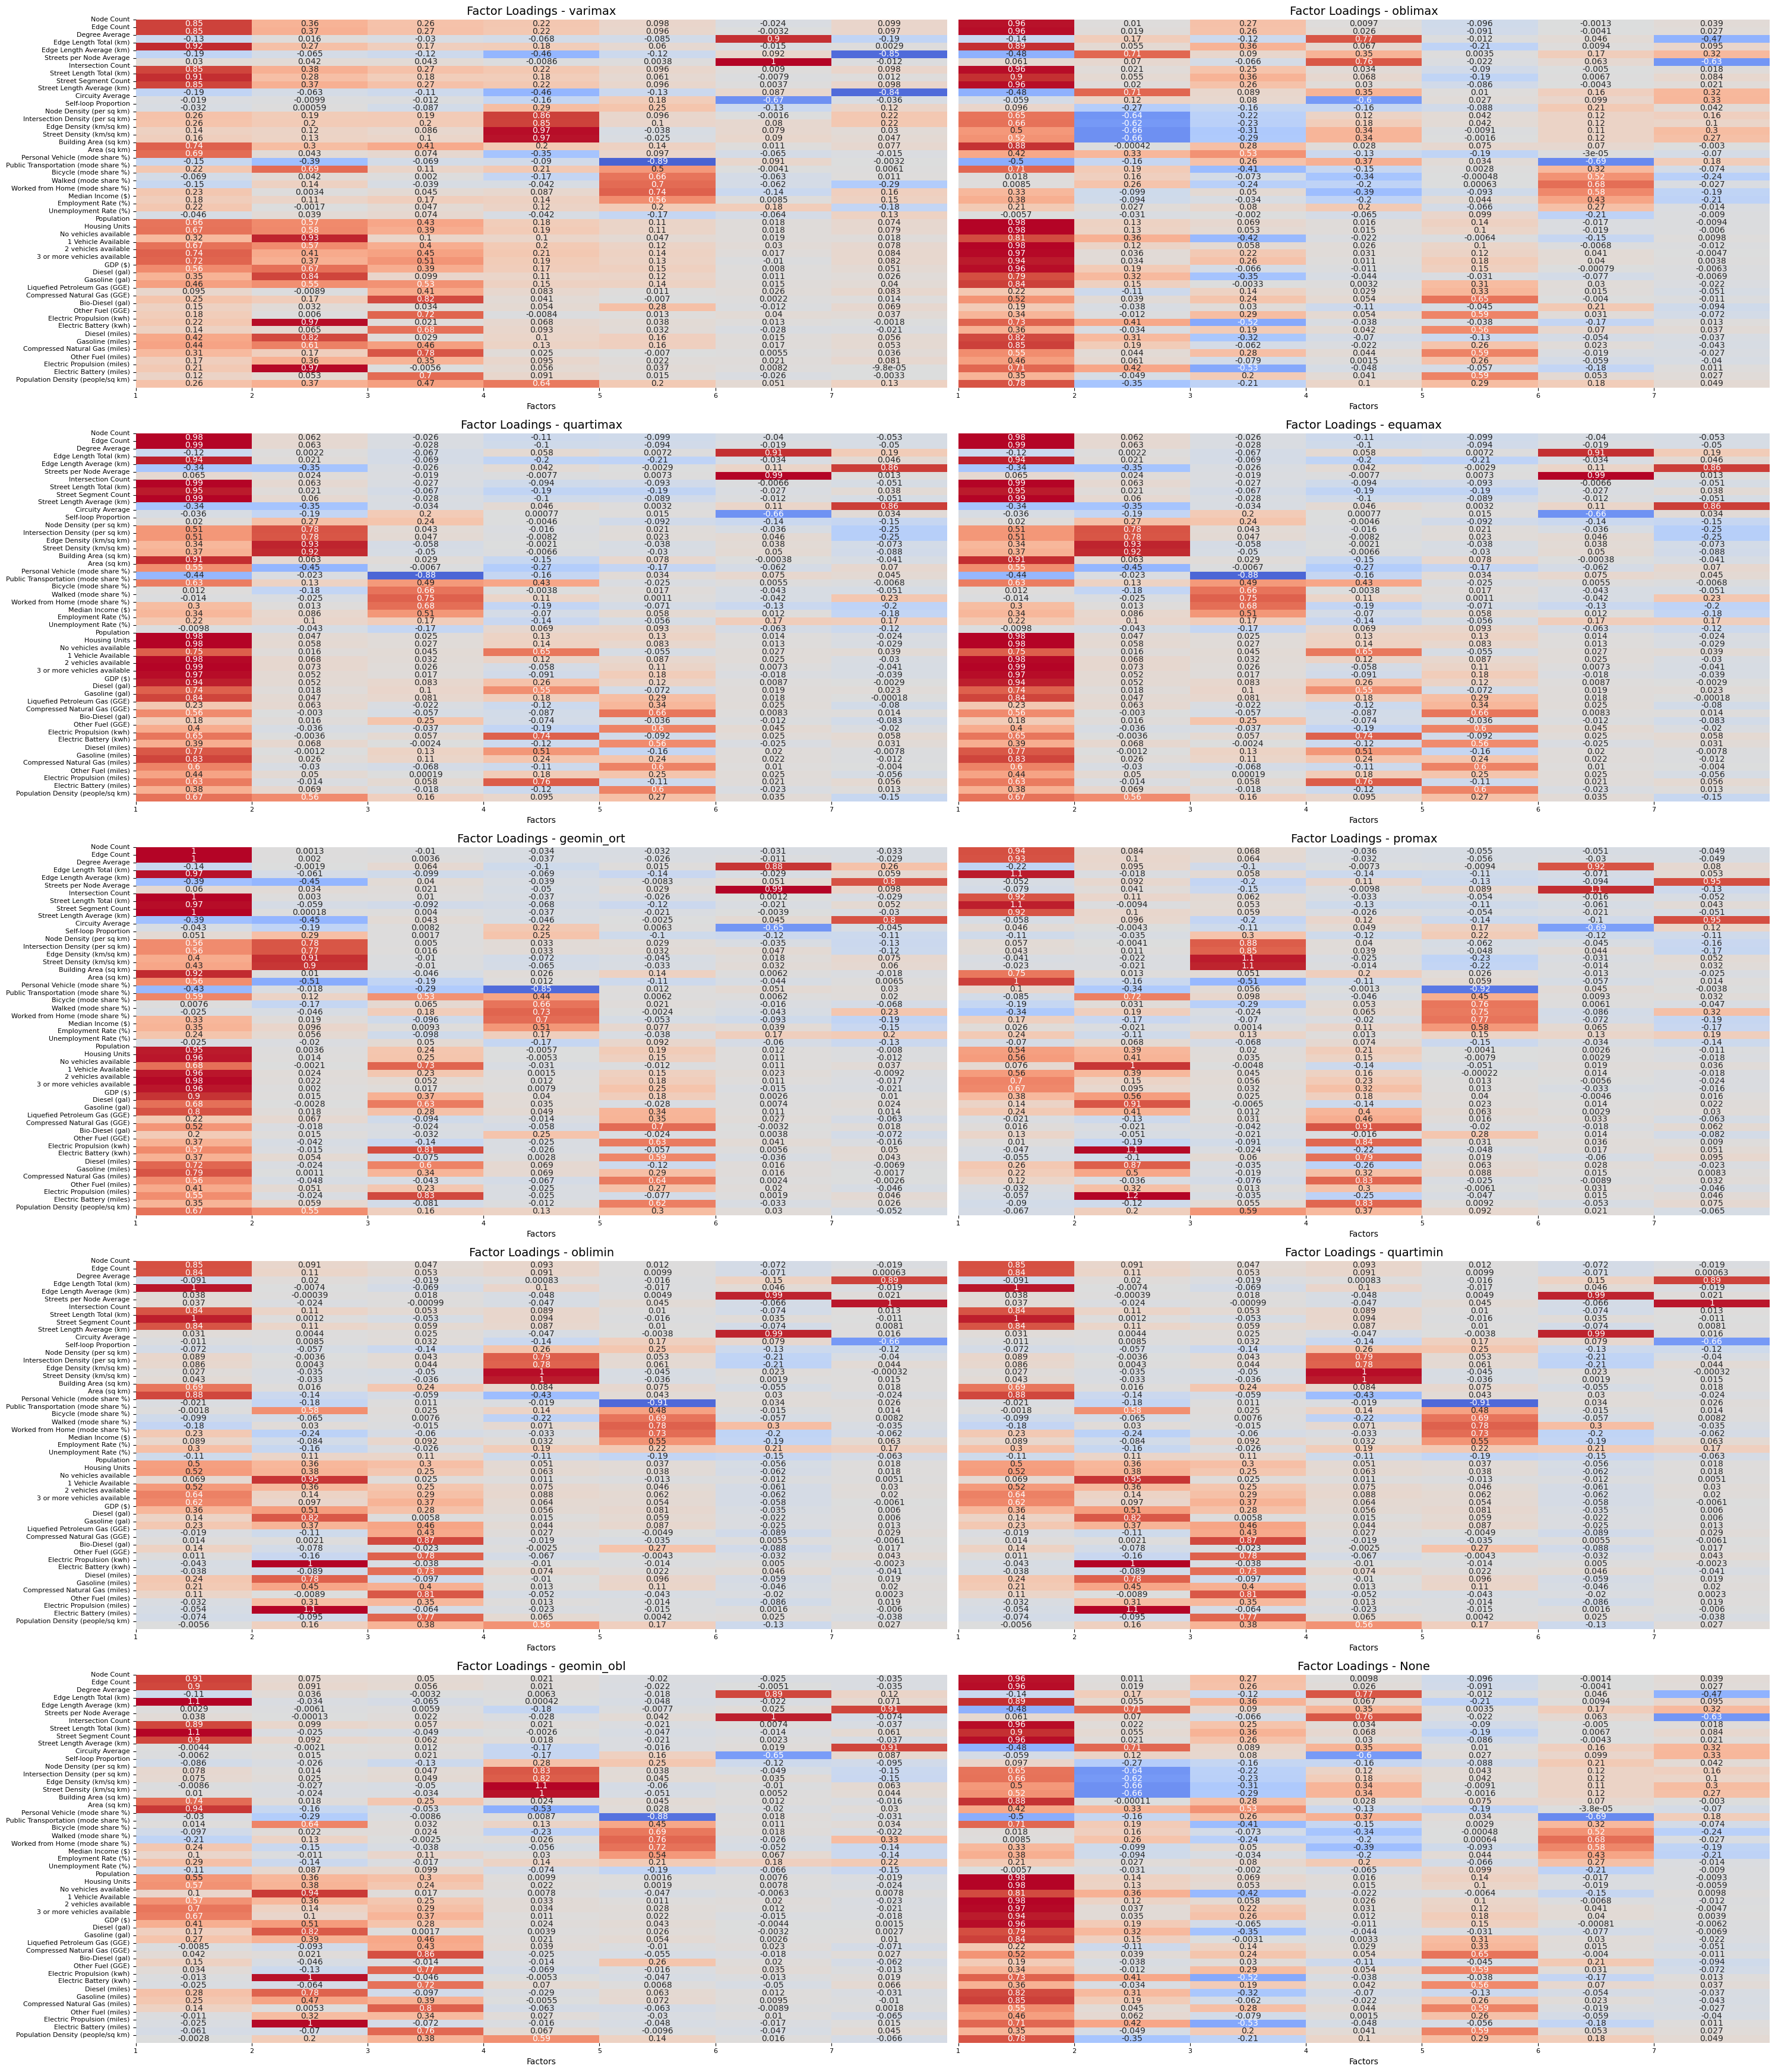

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2

# Assuming 'factors_df' is your DataFrame containing the data
# Replace this with your actual data loading and preprocessing steps

# Define the number of factors to retain
n_factors = 7

# Perform Factor Analysis for each rotation and store results
factor_loadings = {}
statistics = {}

# List of rotations to try
rotations = ['varimax', 'oblimax', 'quartimax', 'equamax', 'geomin_ort', 'promax', 'oblimin', 'quartimin', 'geomin_obl', None]

for rotation in rotations:
    # Initialize FactorAnalyzer with current rotation
    fa = FactorAnalyzer(n_factors=n_factors, rotation=rotation,method='ml')
    
    # Fit the data
    fa.fit(data_standardized)
    
    # Get factor loadings
    loadings = fa.loadings_
    
    # Store factor loadings in the dictionary
    factor_loadings[rotation] = loadings

plt.figure(figsize=(30, 35))  # Adjust figsize to accommodate 4 rows and 2 columns

n_rows = 5
n_cols = 2

# Iterate through each rotation and create subplots
for i, rotation in enumerate(rotations):
    # Calculate subplot index based on 1-indexed position in a 4x2 grid
    plt.subplot(n_rows, n_cols, i % (n_rows * n_cols) + 1)
    
    # Plot heatmap of factor loadings
    sns.heatmap(factor_loadings[rotation], annot=True, cmap='coolwarm', center=0, cbar=False)
    plt.title(f'Factor Loadings - {rotation}', fontsize=14)

    # Set x-tick labels to start from 1
    plt.xticks(ticks=np.arange(n_factors), labels=np.arange(1, n_factors + 1), fontsize=8)
    plt.xlabel('Factors')
    
    # Adjust y-axis ticks and labels for the first column of each row
    if i % n_cols == 0:  # Check if subplot is in the leftmost column
        plt.yticks(ticks=np.arange(len(data_standardized.columns)), labels=data_standardized.columns, fontsize=8, rotation=0)
        plt.ylabel('')  # Rotate labels and align to the right
    else:
        plt.yticks([])
        plt.ylabel('')
                
plt.tight_layout()
plt.show()

# Print statistics for each rotation
for rotation, stats in statistics.items():
    print(f"Rotation: {rotation}")
    for key, value in stats.items():
        if isinstance(value, dict):
            print(key)
            for k, v in value.items():
                print(f"  {k}: {v}")
        else:
            print(f"{key}: {value}")
    print("\n")
    
#plt.savefig('../../figures/factor-analysis-rotation.jpg', dpi=600, bbox_inches='tight')   

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_standardized' is your DataFrame containing the standardized data
# Replace this with your actual data loading and preprocessing steps

# Define the number of factors to retain
n_factors = 8

# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax', method='ml')
fa.fit(data_standardized)

# Compute factor scores
factor_scores = fa.transform(data_standardized)

# Convert factor scores to a DataFrame
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor {i+1}' for i in range(n_factors)])

# Plot pairwise relationships between factor scores
sns.pairplot(factor_scores_df)
plt.suptitle('Pairwise Relationships of Factor Scores', y=1.02)
plt.show()


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


NameError: name 'data_standardized' is not defined

The fellowing is just some trial of KPCA and PCA

In [ ]:
# Initialize FactorAnalyzer with Maximum Likelihood method
n_factors = 7  # Adjust the number of factors as needed
fa = FactorAnalyzer(n_factors=n_factors, method='ml', rotation=None)

# Fit the model to your standardized data
fa.fit(data_standardized)

# Get factor loadings
loadings = fa.loadings_

# Get variance explained by each factor
variance_explained = fa.get_factor_variance()[0].sum()
Proportion_of_Variance = fa.get_factor_variance()[1].sum()
Cumulative_Variance = fa.get_factor_variance()[2][6]

# Calculate statistics
chi_square_value = fa.get_factor_variance()[2].sum()  # Sum of chi-square values
dof = data_standardized.shape[0] - n_factors - 1  # Degrees of freedom
p_value = 1 - chi2.cdf(chi_square_value, dof)  # Compute p-value
rms = fa.get_communalities().sum()  # Sum of communalities
rmsea = np.sqrt(rms / dof)  # RMSEA
n_samples, n_variables = data_standardized.shape
BIC = chi_square_value + n_factors * np.log(n_samples)  # BIC
TLI = 1 - ((chi_square_value - dof) / chi_square_value)  # TLI

# Create a DataFrame to store the results
MLF_results = pd.DataFrame({
    'Chi-Square Value': [chi_square_value],
    'Degrees of Freedom': [dof],
    'RMS': [rms],
    'RMSEA': [rmsea],
    'BIC': [BIC],
    'TLI': [TLI],
    'Variance Explained': [variance_explained],
    #'Proportion of Variance': [Proportion_of_Variance],
    'Cumulative_Variance': [Cumulative_Variance]
}, index=['Maximum Likelihood'])



# Display the results
MLF_results

In [ ]:
# Get factor loadings from the FactorAnalyzer object
loadings = fa.loadings_

# Plot heatmap of factor loadings
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, cbar=False)

# Set y-axis labels to be column names of the original DataFrame
plt.yticks(ticks=range(len(data_standardized.columns)), labels=data_standardized.columns, fontsize=12)

plt.title('Maximum Likelihood Factor Loadings Heatmap', fontsize=16)
plt.xlabel('Factors', fontsize=14)
plt.ylabel('', fontsize=14)

plt.xticks(ticks=range(loadings.shape[1]), labels=range(1, loadings.shape[1] + 1), fontsize=12)
plt.show()

In [ ]:
# Initialize FactorAnalyzer with Principal Axis Factoring (PAF) method
n_factors = 7  # Adjust the number of factors as needed
fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation=None)

# Fit the model to your standardized data
fa.fit(data_standardized)

# Get factor loadings
loadings = fa.loadings_

# Get variance explained by each factor
variance_explained = fa.get_factor_variance()[0].sum()
Proportion_of_Variance = fa.get_factor_variance()[1].sum()
Cumulative_Variance = fa.get_factor_variance()[2][6]

# Calculate statistics
chi_square_value = fa.get_factor_variance()[2].sum()  # Sum of chi-square values
dof = data_standardized.shape[0] - n_factors - 1  # Degrees of freedom
p_value = 1 - chi2.cdf(chi_square_value, dof)  # Compute p-value
rms = fa.get_communalities().sum()  # Sum of communalities
rmsea = np.sqrt(rms / dof)  # RMSEA
n_samples, n_variables = data_standardized.shape
BIC = chi_square_value + n_factors * np.log(n_samples)  # BIC
TLI = 1 - ((chi_square_value - dof) / chi_square_value)  # TLI

# Create a DataFrame to store the results
PAF_results = pd.DataFrame({
    'Chi-Square Value': [chi_square_value],
    'Degrees of Freedom': [dof],
    'RMS': [rms],
    'RMSEA': [rmsea],
    'BIC': [BIC],
    'TLI': [TLI],
    'Variance Explained': [variance_explained],
    #'Proportion of Variance': [Proportion_of_Variance],
    'Cumulative_Variance': [Cumulative_Variance]
}, index=['Principal Axis Factoring'])

# Display the results
PAF_results

# Plot factor loadings using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, cbar=False)
plt.title('Factor Loadings - Principal Axis Factoring', fontsize=14)
plt.xticks(ticks=np.arange(n_factors), labels=np.arange(1, n_factors + 1), fontsize=10)
plt.yticks(ticks=np.arange(len(data_standardized.columns)), labels=data_standardized.columns, fontsize=10, rotation=0)
plt.xlabel('Factors')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
combined_results = pd.concat([MLF_results, PAF_results], axis=0)
combined_results
combined_results=combined_results.transpose()
combined_results

In [ ]:
combined_results.index

In [ ]:
comparison_df.index

In [ ]:

factor_compar = pd.concat([combined_results, comparison_df], axis=1)
factor_compar

In [ ]:
# Perform PCA
pca = PCA()
pca.fit(data_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Reconstruction error (MSE)
reconstructed_data = pca.inverse_transform(pca.transform(data_standardized))
mse = np.mean((data_standardized - reconstructed_data) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

# Kaiser-Meyer-Olkin (KMO) measure
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_standardized)
print(f"KMO Measure: {kmo_model}")

# Goodness of fit summary
print("\nGoodness of Fit Summary:")
print(f"Explained Variance Ratio: {explained_variance_ratio}")
print(f"Cumulative Variance Explained: {cumulative_variance_ratio[-1]}")
print(f"Reconstruction Error (MSE): {mse}")
print(f"KMO Measure: {kmo_model}")

In [ ]:
#dimensionality reduction
def plotcomp(Z, x=0, y=1, z= 2):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(Z.T[x], Z.T[y], Z.T[z])#, c=tsne.T[3])
    return

In [ ]:
#multidimensional scaling
nmds = manifold.MDS(
    n_components=3,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="euclidean",
    random_state=1,
    n_jobs=8,
    n_init=1,
    normalized_stress="auto",
)
npos = nmds.fit_transform(data_standardized)

In [ ]:
plt.scatter(npos.T[0], npos.T[1], c= npos.T[2])

In [ ]:
plotcomp(npos)

In [ ]:
#Spectral embedding

In [ ]:
se = manifold.SpectralEmbedding(
    n_components=4
)
Z_se = se.fit_transform(data_standardized)

In [ ]:
plotcomp(Z_se,0,1,2)

In [ ]:
plt.scatter(Z_se.T[0], Z_se.T[2],c = Z_se.T[1],cmap=plt.cm.rainbow)

In [ ]:
#LLE (hessian eigenmapping)

In [ ]:
data_standardized.shape

In [ ]:
ndim = data_standardized.shape[1]
kpca_init = decomposition.KernelPCA(n_components= ndim, kernel='cosine')#,gamma=.0001)
kpca_init = kpca_init.fit(data_standardized)

plt.plot(np.arange(1, ndim+1),np.cumsum(kpca_init.eigenvalues_)/np.sum(kpca_init.eigenvalues_), 'bo-')
plt.axhline(.862, c='orange', ls='--')
plt.xticks(np.arange(1, ndim+1))
plt.xlim(1,ndim)
plt.grid(True)
plt.ylabel('Prop. of cumul. variance explained')
plt.xlabel('Number of kernel principal components')
plt.tight_layout()
plt.savefig('../../figures/scree.png',dpi=360)
plt.show()

In [ ]:
np.cumsum(kpca_init.eigenvalues_)/np.sum(kpca_init.eigenvalues_)

In [ ]:
kpca = decomposition.KernelPCA(n_components=4, kernel='cosine')#,gamma=.0001)# kernel='cosine')
kpca = kpca.fit(data_standardized)
Z_kpca = kpca.transform(data_standardized)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.scatter(Z_kpca.T[0], Z_kpca.T[1], Z_kpca.T[2],c = Z_kpca.T[3], cmap=plt.cm.rainbow)
fig.colorbar(im, ax=ax, label='Kernel PC 4',pad=.12)#, cax=cax, orientation='vertical')
#ax.colorbar(label='Kernel PC 4')
plt.show()

In [ ]:
plt.scatter(Z_kpca.T[0], Z_kpca.T[1], c = Z_kpca.T[2], cmap=plt.cm.rainbow)#, s = 10*(1+ Z_kpca.T[3]))
plt.colorbar(label='Kernel PC 3')
plt.ylabel('Kernel PC 2')
plt.xlabel('Kernel PC 1')
plt.tight_layout()
plt.savefig('../../figures/kpc2-vs-kpc1.png',dpi=360)

In [ ]:
plt.scatter(Z_kpca.T[0], Z_kpca.T[3], c = Z_kpca.T[1], cmap=plt.cm.rainbow)#, s = 10*(1+ Z_kpca.T[3]))
plt.colorbar(label='Kernel PC 2')
plt.ylabel('Kernel PC 4')
plt.xlabel('Kernel PC 1')
plt.tight_layout()
plt.savefig('../../figures/kpc4-vs-kpc1.png',dpi=360)

In [ ]:
#LLE

In [ ]:
lle_standard = manifold.LocallyLinearEmbedding(method="standard",n_neighbors=12, n_components=3)
Z_standard = lle_standard.fit_transform(data_standardized)

In [ ]:
plt.scatter(Z_standard.T[0], Z_standard.T[2], c = Z_standard.T[2], cmap=plt.cm.rainbow)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z_standard.T[0], Z_standard.T[1], Z_standard.T[2])#, c=tsne.T[3])

In [ ]:
#Isomap

In [ ]:
isomap = manifold.Isomap(n_neighbors=12, n_components=3, p=1)
Z_iso = isomap.fit_transform(data_standardized)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z_iso.T[0], Z_iso.T[1], Z_iso.T[2])#, c=tsne.T[3])

In [ ]:
plt.scatter(Z_iso.T[0], Z_iso.T[2], c = Z_iso.T[2], cmap=plt.cm.rainbow)

In [ ]:
#interpreting the component

In [ ]:
def interpretcomp(Z, comp_index, p=13, m=200, max_depth=8):
    rf = RandomForestRegressor(max_features=p, n_estimators=m, oob_score=True)
    rf.fit(data_standardized, Z.T[comp_index])
    print(rf.oob_score_)
    # plt.barh([osm_stat_dict[i] for i in osmdf.columns[1:19]],rf.feature_importances_)
    # plt.xlabel
    return rf.feature_importances_

In [ ]:
rf1 = interpretcomp(Z_kpca, 0)
rf2 = interpretcomp(Z_kpca, 1)
rf3 = interpretcomp(Z_kpca, 2)
rf4 = interpretcomp(Z_kpca, 3)

In [ ]:
factors_dict = {
'n': 'Node count',
'm': 'Edge count',
'k_avg': 'Degree average',
'edge_length_total': 'Edge length total (km)',
'edge_length_avg': 'Edge length average (km)',
'streets_per_node_avg': 'Streets per node average',
'intersection_count': 'Intersection count',
'street_length_total': 'Street length total (km)',
'street_segment_count': 'Street segment count',
'street_length_avg': 'Street length average (km)',
'circuity_avg': 'Circuity average',
'self_loop_proportion': 'Self-loop proportion',
'node_density_km': 'Node density (per sq km)',
'intersection_density_km': 'Intersection density (per sq km)',
'edge_density_km': 'Edge density (km/sq km)',
'street_density_km': 'Street density (km/sq km)',
'builing_area_sqkm': 'Building area (sq km)',
'area_sqkm': 'Area (sq km)',
'    Car, truck, or van:':'Car, truck, or van usage',
'    Public transportation (excluding taxicab)':'Bicycle usage',
'    Walked':'Walked', 
'    Taxicab, motorcycle, or other means':'Taxicab, motorcycle, or other means',
'    Worked from home':'Worked from home', 
'Median Income':'Median Income',
'Employment Rate':'Employment Rate',
'Unemployment Rate':'Unemployment Rate',
'    Total population':'Total population',
'Total housing units':'Total housing units',
'GDP':'GDP',
'Diesel (gal)':'Diesel (gal)',
'Gasoline (gal)':'Gasoline (gal)',
'Diesel (miles)':'Diesel (miles)',
'Gasoline (miles)':'Gasoline (miles)',
}

In [ ]:
factors_df.columns

In [ ]:
# Clean the dictionary keys and DataFrame columns
cleaned_factors_dict = {k.strip(): v for k, v in factors_dict.items()}
cleaned_factors_df_columns = [col.strip() for col in factors_df.columns]

# Ensure DataFrame columns match cleaned dictionary keys
factors_df = pd.DataFrame(columns=cleaned_factors_df_columns)

# Create the DataFrame, ensuring keys exist in the dictionary
kpc_fi = pd.DataFrame([[cleaned_factors_dict.get(i, i) for i in cleaned_factors_df_columns[1:19]], rf1, rf2, rf3, rf4]).transpose()

# Assign cleaned column names back to the DataFrame
kpc_fi.columns = ['stat', 'RF1', 'RF2', 'RF3', 'RF4']

In [ ]:
kpc_fi.columns = ['stat', 'kPC1', 'kPC2', 'kPC3', 'kPC4']
#kpc_fi = kpc_fi.set_index('stat')

In [ ]:
kpc_fi_melt = kpc_fi.melt(id_vars='stat')

In [ ]:
kpc_fi_melt

In [ ]:
import seaborn as sns

# Create a sorted list of factor names ensuring all keys are found
sorted_factors = sorted([cleaned_factors_dict.get(i.strip(), i.strip()) for i in cleaned_factors_df_columns[1:38]])

# Create the FacetGrid
g = sns.FacetGrid(kpc_fi_melt, col="variable", height=5, aspect=.65)

# Map the barplot with the correct order
g.map(sns.barplot, "value", "stat", order=sorted_factors)

# Set the xlabel
g.set(xlabel='Importance score')

# Flatten the axes
axes = g.axes.flatten()


In [ ]:
len(sorted_factors)

In [ ]:
cleaned_factors_dict